In [412]:
import pandas as pd
import quandl
import numpy as np
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [413]:
df=quandl.get("WIKI/GOOGL")
            # getting data

In [414]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [415]:
df.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,1092.57,1108.70,1087.21,1094.00,1990515.0,0.0,1.0,1092.57,1108.70,1087.21,1094.00,1990515.0
2018-03-22,1080.01,1083.92,1049.64,1053.15,3418154.0,0.0,1.0,1080.01,1083.92,1049.64,1053.15,3418154.0
2018-03-23,1051.37,1066.78,1024.87,1026.55,2413517.0,0.0,1.0,1051.37,1066.78,1024.87,1026.55,2413517.0
2018-03-26,1050.60,1059.27,1010.58,1054.09,3272409.0,0.0,1.0,1050.60,1059.27,1010.58,1054.09,3272409.0
2018-03-27,1063.90,1064.54,997.62,1006.94,2940957.0,0.0,1.0,1063.90,1064.54,997.62,1006.94,2940957.0


In [416]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3424 entries, 2004-08-19 to 2018-03-27
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         3424 non-null   float64
 1   High         3424 non-null   float64
 2   Low          3424 non-null   float64
 3   Close        3424 non-null   float64
 4   Volume       3424 non-null   float64
 5   Ex-Dividend  3424 non-null   float64
 6   Split Ratio  3424 non-null   float64
 7   Adj. Open    3424 non-null   float64
 8   Adj. High    3424 non-null   float64
 9   Adj. Low     3424 non-null   float64
 10  Adj. Close   3424 non-null   float64
 11  Adj. Volume  3424 non-null   float64
dtypes: float64(12)
memory usage: 347.8 KB


In [418]:
import numpy as np

In [419]:
df['HL_pct']=(df['Adj. High'] - df['Adj. Close'])/df['Adj. Close'] *100
df['pct_chng']=(df['Adj. Open']-df['Adj. Close'])/df['Adj. Open'] *100
df1=df[['Adj. Close','HL_pct','pct_chng','Adj. Volume']]
df1
#finding percentage change, might look tough when you see it after some time, but it is easy.

,Adj. Close,HL_pct,pct_chng,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,-0.324968,44659000.0
2004-08-20,54.322689,0.710922,-7.227007,22834300.0
2004-08-23,54.869377,3.729433,1.227880,18256100.0
2004-08-24,52.597363,6.417469,5.726357,15247300.0
2004-08-25,53.164113,1.886792,-1.183658,9188600.0
...,...,...,...,...
2018-03-21,1094.000000,1.343693,-0.130884,1990515.0
2018-03-22,1053.150000,2.921711,2.487014,3418154.0
2018-03-23,1026.550000,3.918952,2.360729,2413517.0


In [420]:
#import matplotlib

In [421]:
df1['Adj. Close']

Date
2004-08-19      50.322842
2004-08-20      54.322689
2004-08-23      54.869377
2004-08-24      52.597363
2004-08-25      53.164113
                 ...     
2018-03-21    1094.000000
2018-03-22    1053.150000
2018-03-23    1026.550000
2018-03-26    1054.090000
2018-03-27    1006.940000
Name: Adj. Close, Length: 3424, dtype: float64

In [422]:
forecast_col='Adj. Close'
df1.fillna(-9999,inplace=True)# we make a variable forecast column which will be used as our label(the thing we have to predict)
#fillna just fills up the NaN values(you have already used it before.)

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [423]:
import math

In [424]:
forecast_out=int(math.ceil(0.01*len(df1)))#'ceil' just rounds off to the nearest integer, 0.1 *len(df1) is just using 342 rows out of 3424 rows, it can be changed later.
df1['label']=df1[forecast_col].shift(-forecast_out)# here we make our label column.

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [425]:
df1.iloc[343,0]

214.00561483153143

In [426]:
df1['Adj. Close'].head()

Date
2004-08-19    50.322842
2004-08-20    54.322689
2004-08-23    54.869377
2004-08-24    52.597363
2004-08-25    53.164113
Name: Adj. Close, dtype: float64

In [427]:
df1.head()
df1.tail()

,Adj. Close,HL_pct,pct_chng,Adj. Volume,label
Date,,,,,
2018-03-21,1094.00,1.343693,-0.130884,1990515.0,NaN
2018-03-22,1053.15,2.921711,2.487014,3418154.0,NaN
2018-03-23,1026.55,3.918952,2.360729,2413517.0,NaN
2018-03-26,1054.09,0.491419,-0.332191,3272409.0,NaN
2018-03-27,1006.94,5.720301,5.353887,2940957.0,NaN


In [428]:
df1.dropna(inplace=False).tail()

,Adj. Close,HL_pct,pct_chng,Adj. Volume,label
Date,,,,,
2018-01-30,1177.37,0.896914,0.029718,1792602.0,1094.00
2018-01-31,1182.22,0.346805,0.134312,1643877.0,1053.15
2018-02-01,1181.59,0.495942,-0.476195,2774967.0,1026.55
2018-02-02,1119.20,1.081129,0.729098,5798880.0,1054.09
2018-02-05,1068.76,4.325574,2.893850,3742469.0,1006.94


In [429]:
df1.dropna(inplace=True)

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [430]:
df1.info

<bound method DataFrame.info of              Adj. Close    HL_pct  pct_chng  Adj. Volume        label
Date                                                                 
2004-08-19    50.322842  3.712563 -0.324968   44659000.0    69.078238
2004-08-20    54.322689  0.710922 -7.227007   22834300.0    67.839414
2004-08-23    54.869377  3.729433  1.227880   18256100.0    68.912727
2004-08-24    52.597363  6.417469  5.726357   15247300.0    70.668146
2004-08-25    53.164113  1.886792 -1.183658    9188600.0    71.219849
...                 ...       ...       ...          ...          ...
2018-01-30  1177.370000  0.896914  0.029718    1792602.0  1094.000000
2018-01-31  1182.220000  0.346805  0.134312    1643877.0  1053.150000
2018-02-01  1181.590000  0.495942 -0.476195    2774967.0  1026.550000
2018-02-02  1119.200000  1.081129  0.729098    5798880.0  1054.090000
2018-02-05  1068.760000  4.325574  2.893850    3742469.0  1006.940000

[3389 rows x 5 columns]>

In [431]:
df1.head()

,Adj. Close,HL_pct,pct_chng,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,-0.324968,44659000.0,69.078238
2004-08-20,54.322689,0.710922,-7.227007,22834300.0,67.839414
2004-08-23,54.869377,3.729433,1.227880,18256100.0,68.912727
2004-08-24,52.597363,6.417469,5.726357,15247300.0,70.668146
2004-08-25,53.164113,1.886792,-1.183658,9188600.0,71.219849


In [432]:
df1

,Adj. Close,HL_pct,pct_chng,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,-0.324968,44659000.0,69.078238
2004-08-20,54.322689,0.710922,-7.227007,22834300.0,67.839414
2004-08-23,54.869377,3.729433,1.227880,18256100.0,68.912727
2004-08-24,52.597363,6.417469,5.726357,15247300.0,70.668146
2004-08-25,53.164113,1.886792,-1.183658,9188600.0,71.219849
...,...,...,...,...,...
2018-01-30,1177.370000,0.896914,0.029718,1792602.0,1094.000000
2018-01-31,1182.220000,0.346805,0.134312,1643877.0,1053.150000
2018-02-01,1181.590000,0.495942,-0.476195,2774967.0,1026.550000


In [433]:
df1.head()

,Adj. Close,HL_pct,pct_chng,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,-0.324968,44659000.0,69.078238
2004-08-20,54.322689,0.710922,-7.227007,22834300.0,67.839414
2004-08-23,54.869377,3.729433,1.227880,18256100.0,68.912727
2004-08-24,52.597363,6.417469,5.726357,15247300.0,70.668146
2004-08-25,53.164113,1.886792,-1.183658,9188600.0,71.219849


In [434]:
X=np.array(df1.drop(['label'],1))

X=preprocessing.scale(X)

X_lately=X[-forecast_out:]




In [435]:
df1.dropna(inplace=True)
Y=np.array(df1['label'])


C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [436]:
Y=np.array(df1['label'])

In [437]:
print(len(X),len(Y))

3389 3389


In [438]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2)


In [439]:
#clf=svm.SVR(kernel='rbf')
clf=LinearRegression()
clf.fit(X_train,Y_train)
accuracy=clf.score(X_test,Y_test)

#print(accuracy)

In [440]:
#print(forecast_out)

In [441]:
forecast_set=clf.predict(X_lately)
print(forecast_set,accuracy,forecast_out)

[1077.77636961 1092.63119686 1106.70406111 1101.34149522 1094.79852633
 1092.16493454 1090.70798513 1087.69242263 1081.31859764 1076.9030057
 1074.73018776 1093.9417589  1112.32524816 1116.96561315 1131.99498998
 1135.99379053 1134.75468405 1132.25871173 1134.09272631 1152.2527704
 1151.07668267 1161.80114384 1158.26254206 1166.10830845 1186.05468221
 1198.71667361 1192.67821487 1205.00038355 1210.72126274 1208.27306549
 1199.04407921 1204.94191175 1203.37951895 1138.82381433 1084.28464227] 0.9746436668298429 35


In [442]:
df1.tail()

,Adj. Close,HL_pct,pct_chng,Adj. Volume,label
Date,,,,,
2018-01-30,1177.37,0.896914,0.029718,1792602.0,1094.00
2018-01-31,1182.22,0.346805,0.134312,1643877.0,1053.15
2018-02-01,1181.59,0.495942,-0.476195,2774967.0,1026.55
2018-02-02,1119.20,1.081129,0.729098,5798880.0,1054.09
2018-02-05,1068.76,4.325574,2.893850,3742469.0,1006.94


In [443]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import datetime

In [444]:
df1["forecast"]=np.nan

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [445]:
last_date=df1.iloc[-1].name
last_unix=last_date.timestamp()
one_day=86400
next_unix=last_unix + one_day

In [446]:
for i in forecast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix+= one_day
    df1.loc[next_date]=[np.nan for _ in range(len(df1.columns)-1)] +[i]
    

C:\Users\Om\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


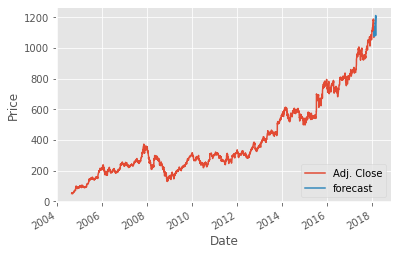

In [447]:
df1['Adj. Close'].plot()
df1['forecast'].plot()
plt.legend(loc=4)

plt.xlabel('Date')
plt.ylabel("Price")
plt.show()

In [448]:
df1.tail()

,Adj. Close,HL_pct,pct_chng,Adj. Volume,label,forecast
Date,,,,,,
2018-03-08 05:30:00,NaN,NaN,NaN,NaN,NaN,1199.044079
2018-03-09 05:30:00,NaN,NaN,NaN,NaN,NaN,1204.941912
2018-03-10 05:30:00,NaN,NaN,NaN,NaN,NaN,1203.379519
2018-03-11 05:30:00,NaN,NaN,NaN,NaN,NaN,1138.823814
2018-03-12 05:30:00,NaN,NaN,NaN,NaN,NaN,1084.284642
